In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data1 = pd.read_pickle("df_results_3_0")
data2 = pd.read_pickle("df_results_4_0")

In [27]:
data = data1.append(data2)

/var/folders/4p/mr19cxrs6_z3dsfws0cjcwfw0000gn/T/ipykernel_27397/2571438737.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data1.append(data2)


In [28]:
data.reset_index(inplace=True)
data.drop("index", axis=1, inplace=True)

In [29]:
data

,Classifier,Precision,Recall,F1-score,Timestamp
0,Support Vector Machines,0.68,0.48,0.56,17052023_2151
1,Decision Tree,0.45,0.52,0.48,17052023_2151
2,Random Forest,0.70,0.65,0.68,17052023_2151
3,Neural Network,0.30,0.52,0.39,17052023_2151
4,Support Vector Machines,0.49,0.45,0.47,17052023_2159
...,...,...,...,...,...
395,Neural Network,0.45,0.42,0.44,20052023_1556
396,Support Vector Machines,0.61,0.50,0.55,20052023_1605
397,Decision Tree,0.34,0.45,0.39,20052023_1605
398,Random Forest,0.88,0.70,0.78,20052023_1605


In [30]:
data.groupby(by="Classifier").mean().round(2)

,Precision,Recall,F1-score
Classifier,,,
Decision Tree,0.42,0.47,0.43
Neural Network,0.42,0.48,0.43
Random Forest,0.74,0.59,0.65
Support Vector Machines,0.58,0.45,0.49


In [31]:
data.describe()

,Precision,Recall,F1-score
count,400.000000,400.000000,400.000000
mean,0.538300,0.494325,0.500500
std,0.165924,0.110374,0.109443
min,0.210000,0.220000,0.270000
25%,0.400000,0.420000,0.420000
50%,0.510000,0.500000,0.480000
75%,0.680000,0.570000,0.570000
max,0.920000,0.780000,0.780000


(0.2, 0.9)

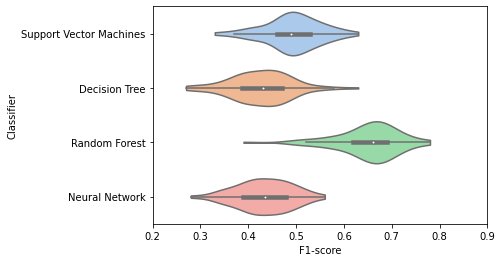

In [33]:
ax = sns.violinplot(data=data, y="Classifier", x="F1-score", orient="h", palette="pastel", showmeans=True, cut=0)
ax.set_xlim(0.2, 0.9)

(0.3, 0.8)

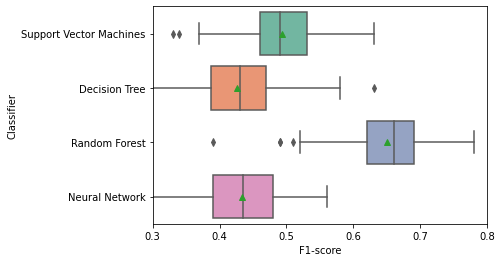

In [34]:
ax = sns.boxplot(data=data, y="Classifier", x="F1-score", orient="h", palette="Set2", showmeans=True)
# sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", color="white", showmeans=True, ax=ax)
ax.set_xlim(0.3, 0.8)

(0.2, 0.8)

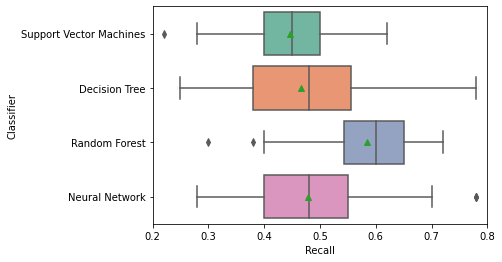

In [35]:
ax = sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", palette="Set2", showmeans=True)
ax.set_xlim(0.2, 0.8)

(0.2, 1.0)

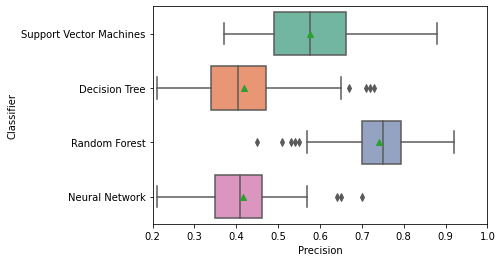

In [37]:
ax = sns.boxplot(data=data, y="Classifier", x="Precision", orient="h", palette="Set2", showmeans=True)
ax.set_xlim(0.2, 1)

In [35]:
# from matplotlib import pyplot as plt

# fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# ax1 = sns.boxplot(data=data, y="Classifier", x="F1-score", orient="h", color="white", showmeans=True, ax=axs[0])
# ax1.set_title("F1-score")

# ax2 = sns.boxplot(data=data, y="Classifier", x="Recall", orient="h", color="white", showmeans=True, ax=axs[1])
# ax2.set_title("Recall")

# plt.tight_layout()
# plt.show()

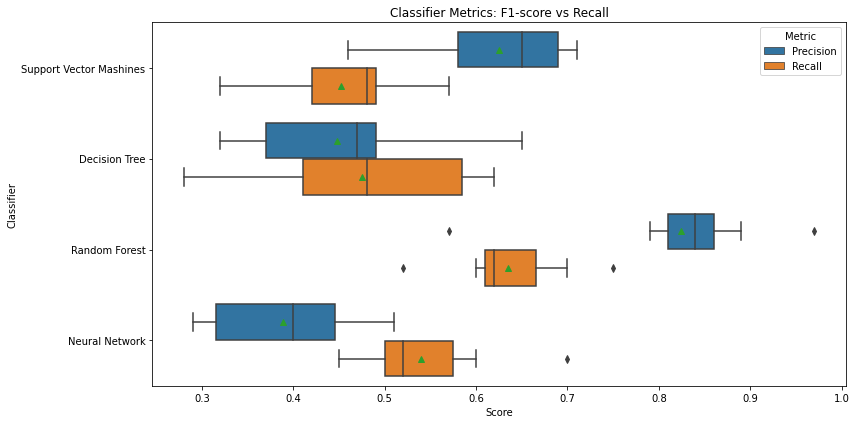

In [38]:
# Reshape the data
data_melted = pd.melt(data, id_vars='Classifier', value_vars=['Precision', 'Recall'], var_name='Metric', value_name='Score')

# Create the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=data_melted, y="Classifier", x="Score", orient="h", hue="Metric", showmeans=True)
ax.set_title("Classifier Metrics: F1-score vs Recall")
plt.tight_layout()
plt.show()